# IRKGL16:  Float128

<ul id="top">
    <li><a href="#Loading-packages"> 
             Loading Packages</a></li>

<li><a href="#Initial-value-problem:-Burrau-problem">
             Initial value problem: Burrau problem</a></li>
           
<li><a href="#Integration-with-IRKGL16-(Adaptive-step)">
             Integration with IRKGL16 (Adaptive-step)</a></li>
             
 <li><a href="#Integration-with-Vern9">
             Integration with Vern9</a></li>

<li><a href="#Error-in-energy">
             Error in energy</a></li> 

</ul>  


## Loading packages

In [1]:
using Pkg
using IRKGaussLegendre,LinearAlgebra,Plots,Statistics
using OrdinaryDiffEq

In [2]:
setprecision(BigFloat, 106)
(typeof(big(0.0)), precision(big(0.0)))

(BigFloat, 106)

<a href="#top">Back to the top</a>

## Initial value problem: Burrau problem

The vector $Gm = (G\, m_1, \ldots, G\, m_N)$

In [3]:
include("InitialBurrau.jl")
u0, Gm =InitialBurrau(BigFloat)
N = length(Gm)
(size(u0), typeof(u0), typeof(Gm))

((2, 3, 3), Array{BigFloat,3}, Array{Int64,1})

Just to check that the output of the function NbodyODE has the expected type:

In [4]:
include("Nbody.jl")
du0=similar(u0)
NbodyODE!(du0,u0,Gm,0.)
@show size(du0);

size(du0) = (2, 3, 3)


In [5]:
t0 = BigFloat(0.)
T = BigFloat(63.) # Final time
dt =BigFloat(10^(-4)) # time-step length

tspan=(t0,T)
prob=ODEProblem(NbodyODE!,u0,tspan,Gm);

<a href="#top">Back to the top</a>


## Integration with IRKGL16 (Adaptive-step)


### Retol=1e-22, abstol=1e-22

In [6]:
#T=63.
#tspan=(t0,T)
(sol1,iter1,steps1)=@time(solve(prob,IRKGL16(),dt=dt,saveat=2*dt,
                          reltol=1e-22, abstol=1e-22,myoutputs=true,initial_interp=true));

 39.799003 seconds (334.57 M allocations: 15.368 GiB, 10.21% gc time)


In [7]:
(length(steps1),minimum(steps1[2:end]),mean(iter1),sum(iter1))

(2146, 3.24315239108608919246667937864981e-07, 17.31407269338304, 37156)

In [8]:
sol1.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  287737
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          2145
Number of rejected steps:                          159

In [9]:
#plot(sol1.t[2:end],iter1[2:end], title="Iteration numbers", legend=false)

In [10]:
#plot(sol1.t,steps1, title="step sizes in the integration", legend=false)

### Iterations=8

In [11]:
(sol2,iter2,steps2)=@time(solve(prob,IRKGL16(),dt=dt,saveat=2*dt, maxiter=8,
                          reltol=1e-22, abstol=1e-22,myoutputs=true,initial_interp=true));

 12.878317 seconds (158.15 M allocations: 7.270 GiB, 14.60% gc time)


In [12]:
(length(steps2),minimum(steps2[2:end]),mean(iter2),sum(iter2))

(2146, 3.24315239082618629929475274573325e-07, 7.996272134203169, 17160)

In [13]:
sol2.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  147194
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          2145
Number of rejected steps:                          159

In [14]:
#plot(sol2.t[2:end],iter2[2:end], title="Iteration numbers", legend=false)

In [15]:
#plot(sol2.t,steps2, title="step sizes in the integration", legend=false)

### Iterations=9

In [16]:
(sol3,iter3,steps3)=@time(solve(prob,IRKGL16(),dt=dt,saveat=2*dt, maxiter=9,
                          reltol=1e-22, abstol=1e-22,myoutputs=true,initial_interp=true));

 14.604137 seconds (174.71 M allocations: 8.036 GiB, 15.14% gc time)


In [17]:
(length(steps3),minimum(steps3[2:end]),mean(iter3),sum(iter3))

(2146, 3.24315239108455840212259152974115e-07, 8.995806150978565, 19305)

In [18]:
sol3.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  165550
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          2145
Number of rejected steps:                          159

In [19]:
#plot(sol3.t[2:end],iter3[2:end], title="Iteration numbers", legend=false)

In [20]:
#plot(sol3.t,steps3, title="step sizes in the integration", legend=false)

### Iterations=10

In [21]:
(sol4,iter4,steps4)=@time(solve(prob,IRKGL16(),dt=dt,saveat=2*dt, maxiter=10,
                          reltol=1e-22, abstol=1e-22,myoutputs=true,initial_interp=true));

 16.419895 seconds (191.37 M allocations: 8.807 GiB, 15.37% gc time)


In [22]:
(length(steps4),minimum(steps4[2:end]),mean(iter4),sum(iter4))

(2146, 3.24315239108592396896427325119275e-07, 9.99534016775396, 21450)

In [23]:
sol4.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  183904
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          2145
Number of rejected steps:                          159

In [24]:
#plot(sol4.t,steps4, title="step sizes in the integration", legend=false)

## Integration with Vern9

In [25]:
solv91 = @time(solve(prob,Vern9(),abstol=1e-18,reltol=1e-18));
solv91.destats

 69.139741 seconds (286.52 M allocations: 12.795 GiB, 12.27% gc time)


DiffEqBase.DEStats
Number of function 1 evaluations:                  266530
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          16658
Number of rejected steps:                          0

In [26]:
solv92= @time(solve(prob,Vern9(),abstol=1e-19,reltol=1e-19));
solv92.destats

 29.642933 seconds (234.24 M allocations: 11.003 GiB, 25.62% gc time)


DiffEqBase.DEStats
Number of function 1 evaluations:                  344786
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          21549
Number of rejected steps:                          0

### Plots

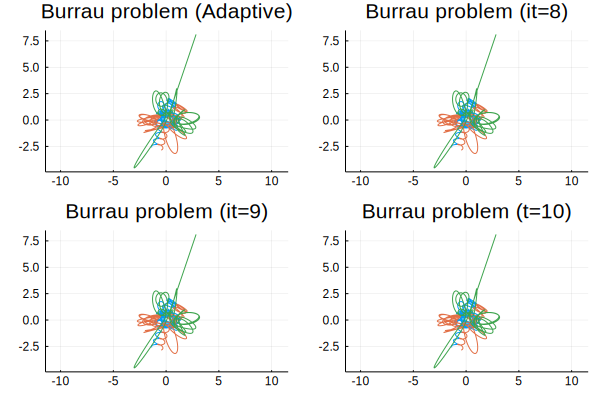

In [27]:
bodylist = ["Body-1", "Body-2", "Body-3"]


pl1 = plot(title="Burrau problem (Adaptive)",aspect_ratio=1)

ulist1 = sol1.u[1:end]
tlist1 = sol1.t[1:end]

for j = 1:3
 xlist  = map(u->u[2,1,j], ulist1)
 ylist  = map(u->u[2,2,j], ulist1)
 pl1 = plot!(xlist,ylist, label = "")   
end  


pl2 = plot(title="Burrau problem (it=8)",aspect_ratio=1)

ulist2 = sol2.u[1:end]
tlist2 = sol2.t[1:end]

for j = 1:3
 xlist  = map(u->u[2,1,j], ulist2)
 ylist  = map(u->u[2,2,j], ulist2)
 pl2 = plot!(xlist,ylist, label = "")   
end  


pl3 = plot(title="Burrau problem (it=9)",aspect_ratio=1)

ulist3 = sol3.u[1:end]
tlist3 = sol3.t[1:end]

for j = 1:3
 xlist  = map(u->u[2,1,j], ulist3)
 ylist  = map(u->u[2,2,j], ulist3)
 pl3 = plot!(xlist,ylist, label = "")   
end  

pl4 = plot(title="Burrau problem (t=10)",aspect_ratio=1)

ulist4 = sol4.u[1:end]
tlist4 = sol4.t[1:end]

for j = 1:3
 xlist  = map(u->u[2,1,j], ulist4)
 ylist  = map(u->u[2,2,j], ulist4)
 pl4 = plot!(xlist,ylist, label = "")   
end  


#plot(pl)
plot(pl1,pl2,pl3,pl4, layout=(2,2)) 

In [28]:
plot(pl2)
savefig("Burrau.png")

<a href="#top">Back to the top</a>

## Error in energy

In [29]:
setprecision(BigFloat, 256)
u0128, Gm =InitialBurrau(BigFloat)
(typeof(u0128),typeof(Gm))

(Array{BigFloat,3}, Array{Int64,1})

In [30]:
E0=NbodyEnergy(u0128,Gm)
end1=length(steps1)


ulist1 = sol1.u[1:end]
tlist1 = sol1.t[1:end]
EnergyErrors1=[NbodyEnergy(BigFloat.(sol1.u[j]),Gm)/E0-1 for j in 1:length(tlist1)]

ulist2 = sol2.u[1:end]
tlist2 = sol2.t[1:end]
EnergyErrors2=[NbodyEnergy(BigFloat.(sol2.u[j]),Gm)/E0-1 for j in 1:length(tlist2)]

ulist3 = sol3.u[1:end]
tlist3 = sol3.t[1:end]
EnergyErrors3=[NbodyEnergy(BigFloat.(sol3.u[j]),Gm)/E0-1 for j in 1:length(tlist3)]

ulist4 = sol4.u[1:end]
tlist4 = sol4.t[1:end]
EnergyErrors4=[NbodyEnergy(BigFloat.(sol4.u[j]),Gm)/E0-1 for j in 1:length(tlist4)]


ulist91 = solv91.u[1:end]
tlist91 = solv91.t[1:end]
EnergyErrors91=[NbodyEnergy(BigFloat.(solv91.u[j]),Gm)/E0-1 for j in 1:length(tlist91)]

ulist92 = solv92.u[1:end]
tlist92 = solv92.t[1:end]
EnergyErrors92=[NbodyEnergy(BigFloat.(solv92.u[j]),Gm)/E0-1 for j in 1:length(tlist92)]


ylimit1=-20
ylimit2=-10


p1=plot(tlist1[1:end],log10.(abs.(EnergyErrors1)),
    ylims=(ylimit1,ylimit2),
    title="adaptive", label="")
p2=plot(tlist2[1:end],log10.(abs.(EnergyErrors2)), 
    ylims=(ylimit1,ylimit2),
    title="it=8",label="")
p3=plot(tlist3[1:end],log10.(abs.(EnergyErrors3)), 
    ylims=(ylimit1,ylimit2),
    title="adaptive it=9",label="")
p4=plot(tlist4[1:end],log10.(abs.(EnergyErrors4)), 
    ylims=(ylimit1,ylimit2),
    title="adaptive it=10",label="")
pv91=plot(tlist91[1:end],log10.(abs.(EnergyErrors91)), 
    ylims=(ylimit1,ylimit2),
    title="vern9 (tol=e-13)",label="")
pv92=plot(tlist92[1:end],log10.(abs.(EnergyErrors92)), 
    ylims=(ylimit1,ylimit2),
    title="vern9 (tol=e-14)",label="");

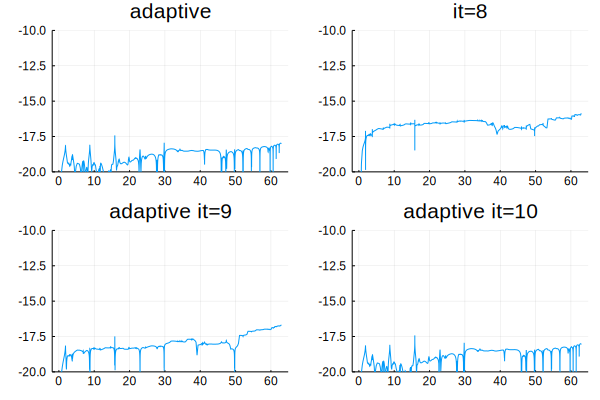

In [31]:
plot(p1,p2,p3,p4, layout=(2,2))

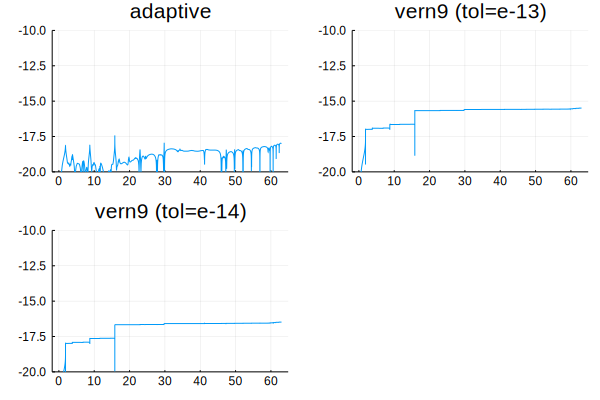

In [32]:
plot(p1,pv91,pv92,layout=(3))